In [16]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [17]:
dic = []
url = "https://www.floweraura.com/reviews/p/10185/chocolate-truffle-cake?page="

In [18]:
# looping through the pages of the URL to gather reviews
for i in range(1,31):
    cnp = url + str(i)
    url_new = cnp
    r = requests.get(url_new)
    soup = BeautifulSoup(r.text, "html.parser")

    main = soup.find("div", {"class": "review-left-container"})
    sub = main.find_all("div", {"class": "new-review-card-container"})

    for _ in sub:
        try:
            name = _.find("span", {"class":"review-author-name"})
            status = _.find("span", {"class":"review-verified-status"})
            city = _.find_all("span", {"class":"review-meta-details"})
            rating = _.find('span', {'class': 'star-count-container'}).find('span')
            occasion = _.find_all('span', {'class': 'review-meta-details'})
            date = _.find('div', {'class': 'review-meta-data'}).find('span')
            comment = _.find_all('div')
            #creating a dictionary of columns
            dic.append({'Names': name.text.title().strip(),
                        'Status': status.text.title().strip(),
                        'Cities': city[0].text.title().strip(),
                        'Rating': rating.text.strip(),
                        'Occasion': occasion[-1].text.title().strip(),
                        'Date': date.text,
                        'Comments': comment[3].text.lower()
                        })
        except AttributeError:
            continue

In [19]:
# Convert reviews to a DataFrame
df_reviews = pd.DataFrame(dic)

In [20]:
print(df_reviews)

                Names    Status              Cities Rating  \
0             Pritesh  Verified            Gurugram      5   
1      Princy Agrawal  Verified               Delhi      5   
2    Pallabi Bhowmick  Verified          Jamshedpur      5   
3         Kripa.Umesh  Verified  Thiruvananthapuram      5   
4     Shikhayadav1827  Verified             Lucknow      5   
..                ...       ...                 ...    ...   
295      Farhat Afrin  Verified            Neemrana      5   
296           Santhya  Verified              Trichy      5   
297            Renuka  Verified       Greater Noida      5   
298    Surabhi Sharma  Verified                Pune      5   
299       Mohit Yadav  Verified               Noida      4   

                    Occasion                       Date  \
0       Occassion : Birthday   Posted On : 1st Jul 2025   
1    Occassion : Anniversary  Posted On : 16th Jun 2025   
2       Occassion : Birthday  Posted On : 13th Apr 2025   
3         Thiruvana

In [21]:
# Data cleaning...
df_reviews = df_reviews.drop_duplicates() # Remove duplicate data
df_reviews[['Occasion_1', 'Occasion_2']] = df_reviews['Occasion'].str.split(':', n=1, expand=True)
df_reviews[['Date_1', 'Date_2']] = df_reviews['Date'].str.split(':', n=1, expand=True)
df_reviews = df_reviews.drop(['Occasion', 'Occasion_1'], axis=1) #remove un_wanted columns
df_reviews = df_reviews.drop(['Date', 'Date_1'], axis=1) #remove un_wanted columns
df_reviews = df_reviews.rename(columns={'Occasion_2': 'Occasion'}) #rename column
df_reviews = df_reviews.rename(columns={'Date_2': 'Date'}) #rename column

In [22]:
print(df_reviews)

                Names    Status              Cities Rating  \
0             Pritesh  Verified            Gurugram      5   
1      Princy Agrawal  Verified               Delhi      5   
2    Pallabi Bhowmick  Verified          Jamshedpur      5   
3         Kripa.Umesh  Verified  Thiruvananthapuram      5   
4     Shikhayadav1827  Verified             Lucknow      5   
..                ...       ...                 ...    ...   
295      Farhat Afrin  Verified            Neemrana      5   
296           Santhya  Verified              Trichy      5   
297            Renuka  Verified       Greater Noida      5   
298    Surabhi Sharma  Verified                Pune      5   
299       Mohit Yadav  Verified               Noida      4   

                                              Comments      Occasion  \
0         the birthday cake was absolutely delicious..      Birthday   
1     the cake was so tasty, literally melted in mouth   Anniversary   
2      really good. looked great and te

In [23]:
df_reviews['Occasion'] = df_reviews['Occasion'].str.replace(r'[^a-zA-Z0-9]', '', regex=True) #Removing non-alphanumeric
df_reviews = df_reviews.replace(r'^\s*$', np.nan, regex=True) #Replace empty strings or whitespace with nan

In [24]:
print(df_reviews)

                Names    Status              Cities Rating  \
0             Pritesh  Verified            Gurugram      5   
1      Princy Agrawal  Verified               Delhi      5   
2    Pallabi Bhowmick  Verified          Jamshedpur      5   
3         Kripa.Umesh  Verified  Thiruvananthapuram      5   
4     Shikhayadav1827  Verified             Lucknow      5   
..                ...       ...                 ...    ...   
295      Farhat Afrin  Verified            Neemrana      5   
296           Santhya  Verified              Trichy      5   
297            Renuka  Verified       Greater Noida      5   
298    Surabhi Sharma  Verified                Pune      5   
299       Mohit Yadav  Verified               Noida      4   

                                              Comments     Occasion  \
0         the birthday cake was absolutely delicious..     Birthday   
1     the cake was so tasty, literally melted in mouth  Anniversary   
2      really good. looked great and teste

In [25]:
rep =['th', 'rd', 'st', 'nd']
for i in rep:
    df_reviews['Date'] = df_reviews['Date'].str.replace(i, '')

In [26]:
print(df_reviews)

                Names    Status              Cities Rating  \
0             Pritesh  Verified            Gurugram      5   
1      Princy Agrawal  Verified               Delhi      5   
2    Pallabi Bhowmick  Verified          Jamshedpur      5   
3         Kripa.Umesh  Verified  Thiruvananthapuram      5   
4     Shikhayadav1827  Verified             Lucknow      5   
..                ...       ...                 ...    ...   
295      Farhat Afrin  Verified            Neemrana      5   
296           Santhya  Verified              Trichy      5   
297            Renuka  Verified       Greater Noida      5   
298    Surabhi Sharma  Verified                Pune      5   
299       Mohit Yadav  Verified               Noida      4   

                                              Comments     Occasion  \
0         the birthday cake was absolutely delicious..     Birthday   
1     the cake was so tasty, literally melted in mouth  Anniversary   
2      really good. looked great and teste

In [27]:
#Changing the data type
df_reviews['Date'] = pd.to_datetime(df_reviews['Date'])
df_reviews['Rating'] = df_reviews['Rating'].astype(int)

for i in df_reviews['Comments']:
    df_reviews['Polarity'] = TextBlob(i).sentiment[0]
    df_reviews['Subjectivity'] = TextBlob(i).sentiment[1]

p = df_reviews['Polarity'].mean()

In [28]:
def score(value):
    if value <= 0.1:
        return  'negative'
    else:
        return 'positive'


[Text(0, 0, '300')]

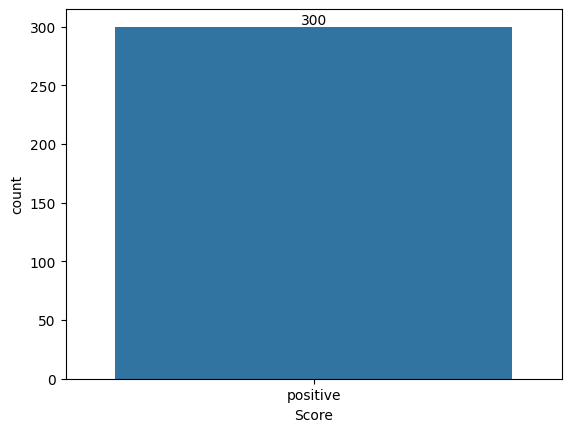

In [29]:
df_reviews['Score'] = df_reviews['Polarity'].apply(score)
asha = sns.countplot(x=df_reviews['Score'], data= df_reviews)

asha.bar_label(container= asha.containers[0])


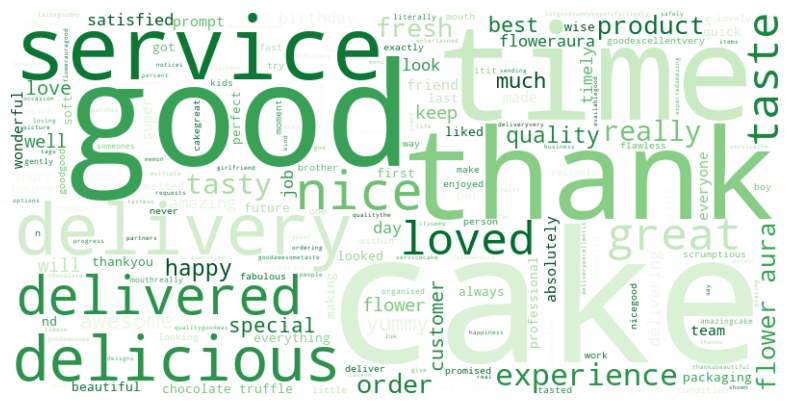

In [34]:
#joining text together into a single string
all_text = "".join(text for text in df_reviews['Comments'])
cloud = WordCloud(stopwords= STOPWORDS, width=800, height=400, background_color='White', colormap='Greens').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()